In [7]:
# setup dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 
import re

In [8]:
# Upload csv file
shoe_data = pd.read_csv("clean_data.csv")

In [10]:
# display data
shoe_data.head()

,id,brand,primaryCategories,colors,ean / upc,manufacturer,name,prices.amountMax,prices.amountMin,prices.availability,...,color 4,color 5,color 6,category 1,category 2,category 3,category 4,category 5,category 6,category 7
0,AV2A4MxtvKc47QAVol_G,Nomad,Shoes,"Bluewhite Flower Burst,Blue/White Flower Burst",638000000000,Nomad Footwear,Women's Puddles Boot,36.00,36.00,False,...,Burst,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,Backpacking Boots,All Women's Shoes
1,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
2,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
3,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
4,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN


In [29]:
#create loop to figure out shoe types
for name in shoe_data["name"]:
    
    #print(bool(re.search("boot*",name.lower())))

SyntaxError: unexpected EOF while parsing (<ipython-input-29-09f8904c2384>, line 4)

In [30]:
# find the different kinds of shoes we are looking for: flats, athletic shoe, boot, sandal/filp flops, heels/pumps, other

names = ["boot" if "boot" in name else "other" for name in shoe_data["name"]]

#print(names)

for index,name in shoe_data["name"].iteritems():
    #print(name)
    if bool(re.search("boot*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "boot"
    elif bool(re.search("flat*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "flat"
    elif bool(re.search("athletic*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("sandal*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "sandal"
    elif bool(re.search("heel*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "heel"
    else:
        shoe_data.loc[index,"Shoe Category"] = "other"

shoe_category = shoe_data["Shoe Category"] 

shoe_data["Shoe Category"] = shoe_category

shoe_data.head()

,id,brand,primaryCategories,colors,ean / upc,manufacturer,name,prices.amountMax,prices.amountMin,prices.availability,...,color 5,color 6,category 1,category 2,category 3,category 4,category 5,category 6,category 7,Shoe Category
0,AV2A4MxtvKc47QAVol_G,Nomad,Shoes,"Bluewhite Flower Burst,Blue/White Flower Burst",638000000000,Nomad Footwear,Women's Puddles Boot,36.00,36.00,False,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,Backpacking Boots,All Women's Shoes,boot
1,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat
2,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat
3,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat
4,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat


In [31]:
# count the types of shoes
shoe_count = shoe_data["Shoe Category"].value_counts()

shoe_count

other       3628
boot        3393
sandal      1276
flat        1075
heel         533
athletic      95
Name: Shoe Category, dtype: int64

([<matplotlib.patches.Wedge at 0x18d679f5610>,
 [Text(-1.0848632513197642, -0.5129051822080863, 'Other'),
  Text(0.9683612256881353, -0.5218012424130211, 'Boots'),
  Text(0.6194979128294409, 0.9089677310003731, 'Sandals'),
  Text(-0.15388892580614777, 1.0891823531963003, 'Flats'),
  Text(-0.6617819041290047, 0.8786607487349078, 'Heels'),
  Text(-0.8211743207591303, 0.7318966695687179, 'Athletic')],
 [Text(-0.6328368966031959, -0.2991946896213836, '36.3%'),
  Text(0.5281970321935283, -0.2846188594980114, '33.9%'),
  Text(0.3379079524524223, 0.495800580545658, '12.8%'),
  Text(-0.08393941407608059, 0.5940994653798001, '10.8%'),
  Text(-0.36097194770672986, 0.47926949930994966, '5.3%'),
  Text(-0.4479132658686165, 0.39921636521930065, '0.9%')])

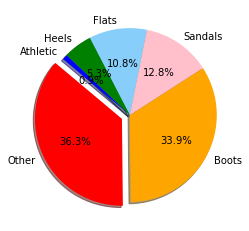

In [32]:
# create pie chart for the different kinds of shoes for women that are produced based on this dataset

# labels for the pie chart
labels = ["Other", "Boots", "Sandals", "Flats", "Heels", "Athletic"]

# the number of shoes produced for each category
sizes = shoe_count

# set colors for each shoe category for our pie chart
colors = ["red", "orange", "pink", "lightskyblue", "green", "blue"]

# seperate the "Others" section from the others
explode = (0.1, 0, 0, 0, 0, 0)

# create pie chart to display kinds of shoe values for women
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

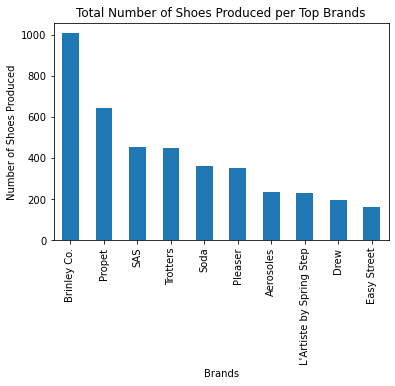

In [43]:
# list the brand that produces the highest number of shoes based on frequency
brands = shoe_data["brand"].value_counts()

# sort by the top 10 brands that produce the most shoes
#top_brands = shoe_data.groupby("brand").shoe_counts.nlargest(10).reset_index()
top_brands = brands.head(10)

# create bar chart
top_brands.plot(kind="bar")
plt.ylabel("Number of Shoes Produced")
plt.xlabel("Brands")
plt.title("Total Number of Shoes Produced per Top Brands")
plt.show()